# Aim
This kernel is prepared to be a container of many broad topics in the field of time series analysis. The motive is to make this the ultimate reference to time series analysis for beginners and experienced people alike.

In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from chart_studio import plotly 
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

DATA_DIR = "../time-series-analysis/input"
print(os.listdir(DATA_DIR))

In [ ]:
from chart_studio.plotly.plotly import tools
import chart_studio.plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

init_notebook_mode(connected=True)


1. Introduction to date and time
    - 1.1 Importing time series data
    - 1.2 Cleaning and preparing time series data
    - 1.3 Visualizing the datasets
    - 1.4 Timestamps and Periods
    - 1.5 Using date_range
    - 1.6 Using to_datetime
    - 1.7 Shifting and lags
    - 1.8 Resampling
2. Finance and Statistics
    - 2.1 Percent change
    - 2.2 Stock returns
    - 2.3 Absolute change in successive rows
    - 2.4 Comaring two or more time series
    - 2.5 Window functions
    - 2.6 OHLC charts
    - 2.7 Candlestick charts
    - 2.8 Autocorrelation and Partial Autocorrelation
3. Time series decomposition and Random Walks
    - 3.1 Trends, Seasonality and Noise
    - 3.2 White Noise
    - 3.3 Random Walk
    - 3.4 Stationarity
4. Modelling using statsmodels
    - 4.1 AR models
    - 4.2 MA models
    - 4.3 ARMA models
    - 4.4 ARIMA models
    - 4.5 VAR models
    - 4.6 State space methods
        - 4.6.1 SARIMA models
        - 4.6.2 Unobserved components
        - 4.6.3 Dynamic Factor models

# 1. Introduction to date and time

## 1.1 Importing time series data

### How to import data?
First, we import all the datasets needed for this kernel. The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter. 
#### Data being used:-
1. Google  Stocks Data
2. Humidity in different world cities
3. Microsoft  Stocks Data
3. Pressure in different world cities

In [ ]:
google = pd.read_csv(DATA_DIR+'/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

In [ ]:
humidity = pd.read_csv(DATA_DIR+'/historical-hourly-weather-data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

## 1.2 Cleaning and preparing time series data

### How to prepare data?
Google stocks data doesn't have any missing values but humidity data does have its fair share of missing values. It is cleaned using **fillna()** method with **ffill** parameter which propagates last valid observation to fill gaps

In [ ]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

## 1.3 Visualizing the datasets

In [ ]:
humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

In [ ]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

## 1.4 Timestamps and Periods

### What are timestamps and periods and how are they useful?
Timestamps are used to represent a point in time. Periods represent an interval in time. Periods can be used to check if a specific event is in the given period. They can also be converted to each other's form.

In [ ]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

In [ ]:
# Creating a period
period = pd.Period('2017-01-01')
period

In [ ]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

In [ ]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

In [ ]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

## 1.5 Using date_range

### What is date_range and how is it useful?
**date_range** is a method that returns  a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [ ]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

In [ ]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

In [ ]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

In [ ]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

## 1.6 Using to_datetime 

pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.

In [ ]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

In [ ]:
df = pd.to_datetime(df)
df

In [ ]:
df = pd.to_datetime('01-01-2017')
df

## 1.7 Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

In [ ]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

## 1.8 Resampling
- **Upsampling** - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data
- **Downsampling** - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.


In [ ]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv(DATA_DIR+'/historical-hourly-weather-data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

Cleaning is required.

In [ ]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

In [ ]:
pressure = pressure.fillna(method='bfill')
pressure.head()

First, we used **ffill** parameter which propagates last valid observation to fill gaps. Then we use **bfill** to propogate next valid observation to fill gaps.

In [ ]:
# Shape before resampling(downsampling)
pressure.shape

In [ ]:
# We downsample from hourly to 3 day frequency aggregated using mean
pressure = pressure.resample('3D').mean()
pressure.head()

In [ ]:
# Shape after resampling(downsampling)
pressure.shape

Much less rows are left. Now, we will upsample from 3 day frequency to daily frequency

In [ ]:
pressure = pressure.resample('D').ffill()
pressure.head()

In [ ]:
# Shape after resampling(upsampling)
pressure.shape

Again an increase in number of rows. Resampling is cool when used properly.

# 2. Finance and statistics

## 2.1 Percent change

In [ ]:
google['Pct_Change'] = google.High.div(google.High.shift()) - 1
google['Pct_Change'].plot(figsize=(20,8))

## 2.2 Stock returns 

In [ ]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

In [ ]:
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

## 2.3 Absolute change in successive rows

In [ ]:
google.High.diff().plot(figsize=(20,6))

## 2.4 Comaring two or more time series 

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

In [ ]:
# We choose microsoft stocks to compare them with google
microsoft = pd.read_csv(DATA_DIR+'/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [ ]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

In [ ]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

You can clearly see how google outperforms microsoft over time.

## 2.5 Window functions
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

In [ ]:
# Rolling window functions
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

Now, observe that rolling mean plot is a smoother version of the original plot.

In [ ]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## 2.6 OHLC charts
An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened).

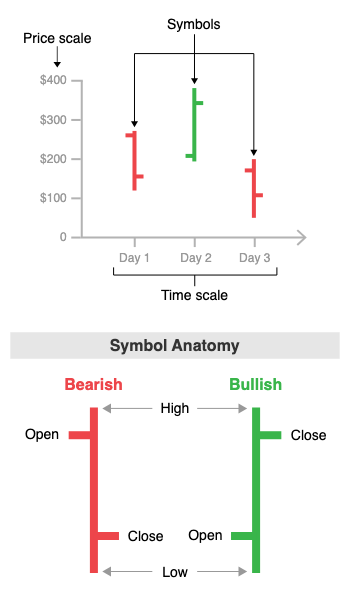

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot

# OHLC chart of 2008
google_2008 = google.loc['2008']
trace = go.Ohlc(x=google_2008.index,
                open=google_2008['Open'],
                high=google_2008['High'],
                low=google_2008['Low'],
                close=google_2008['Close'])

layout = go.Layout(title='Google OHLC Chart - 2008')
fig = go.Figure(data=[trace], layout=layout)

# This will open the plot in your default web browser
plot(fig, filename='google_ohlc_2008.html')


 ## 2.7 Candlestick charts
This type of chart is used as a trading tool to visualise and analyse the price movements over time for securities, derivatives, currencies, stocks, bonds, commodities, etc. Although the symbols used in Candlestick Charts resemble a Box Plot, they function differently and therefore, are not to be confused with one another.

Candlestick Charts display multiple bits of price information such as the open price, close price, highest price and lowest price through the use of candlestick-like symbols. Each symbol represents the compressed trading activity for a single time period (a minute, hour, day, month, etc). Each Candlestick symbol is plotted along a time scale on the x-axis, to show the trading activity over time.

The main rectangle in the symbol is known as the real body, which is used to display the range between the open and close price of that time period. While the lines extending from the bottom and top of the real body is known as the lower and upper shadows (or wick). Each shadow represents the highest or lowest price traded during the time period represented. When the market is Bullish (the closing price is higher than it opened), then the body is coloured typically white or green. But when the market is Bearish (the closing price is lower than it opened), then the body is usually coloured either black or red.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

Candlestick Charts are great for detecting and predicting market trends over time and are useful for interpreting the day-to-day sentiment of the market, through each candlestick symbol's colouring and shape. For example, the longer the body is, the more intense the selling or buying pressure is. While, a very short body, would indicate that there is very little price movement in that time period and represents consolidation.

Candlestick Charts help reveal the market psychology (the fear and greed experienced by sellers and buyers) through the various indicators, such as shape and color, but also by the many identifiable patterns that can be found in Candlestick Charts. In total, there are 42 recognised patterns that are divided into simple and complex patterns. These patterns found in Candlestick Charts are useful for displaying price relationships and can be used for predicting the possible future movement of the market. You can find a list and description of each pattern here.

Please bear in mind, that Candlestick Charts don't express the events taking place between the open and close price - only the relationship between the two prices. So you can't tell how volatile trading was within that single time period.

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot

# Candlestick chart of 2008
google_2008 = google.loc['2008']
trace = go.Candlestick(x=google_2008.index,
                open=google_2008['Open'],
                high=google_2008['High'],
                low=google_2008['Low'],
                close=google_2008['Close'])

layout = go.Layout(title='Google OHLC Chart - 2008')
fig = go.Figure(data=[trace], layout=layout)

# This will open the plot in your default web browser
plot(fig, filename='google_ohlc_2008.html')


## 2.8 Autocorrelation and Partial Autocorrelation
* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags.  The terms can be interpreted the same way as a standard  linear regression, that is the contribution of a change in that particular lag while holding others constant. 

Practical Application when fitting an ARIMA model, you typically:
- Plot the ACF and PACF of your time series.
- Use the ACF to determine the MA order (q).
- Use the PACF to determine the AR order (p).

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

## Autocorrelation

In [ ]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"], title="San Diego")
plt.show()

As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

> Note: When autocorrelations at multiple lags are close to 1 or statistically significant, it means your data has strong persistence or memory over time. This is useful to know for modeling or forecasting, as past values heavily influence future ones.

## Partial Autocorrelation

In [ ]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"])
plt.show()

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

In [ ]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"])
plt.show()

Here, only 0th, 1st and 20th lag are statistically significant.

# 3. Time series decomposition and Random walks

## 3.1. Trends, seasonality and noise
These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

In [ ]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

In [ ]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],period=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values

## 3.2. White noise
White noise has...
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

In [ ]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

In [ ]:
# Plotting autocorrelation of white noise
plot_acf(white_noise)
plt.show()

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

## 3.3. Random Walk

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

In general, if we talk about stocks:
**Today's Price = Yesterday's Price + Noise**

$$
P_t = P_{t-1} + \varepsilon_t
$$

Random walks can't be forecasted because, well—noise is random.

### Random Walk with Drift

*(drift $\mu$ is constant, noise is zero-mean)*

$$
P_t - P_{t-1} = \mu + \varepsilon_t
$$

### Regression Test for Random Walk

$$
P_t = \alpha + \beta P_{t-1} + \varepsilon_t
$$

Equivalent to:

$$
P_t - P_{t-1} = \alpha + (\beta - 1) P_{t-1} + \varepsilon_t
$$

### Test Hypotheses

$$
\begin{aligned}
H_0 &: \beta = 1 \quad \text{(This is a random walk)} \\
H_1 &: \beta < 1 \quad \text{(This is not a random walk)}
\end{aligned}
$$

### Dickey-Fuller Test Regression Form

$$
\Delta P_t = \alpha + \gamma P_{t-1} + \varepsilon_t
$$

### Dickey-Fuller Test Hypotheses

$$
\begin{aligned}
H_0 &: \gamma = 0 \quad \text{(This is a random walk)} \\
H_1 &: \gamma < 0 \quad \text{(This is not a random walk)}
\end{aligned}
$$



### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [ ]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft["Volume"])
adf = adfuller(google["Volume"])

print("p-value of microsoft: {}".format(float(adf[1])))
print("p-value of google: {}".format(float(adf[1])))

# I need to investigate this more!
adf = adfuller(google["Volume"].diff().dropna())
adf = adfuller(decomposed_google_volume.trend.diff().dropna())

print("p-value of google volume diff: {}".format(float(adf[1])))
print("p-value of decomposed_google_volume trend: {}".format(float(adf[1])))

- As microsoft has p-value 0.0003201525 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
- Now google has p-value 0.0000006510 which is less than 0.05, null hypothesis is rejected and this is not a  random walk.

### Generating a random walk

In [ ]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=.01, size=1000)
plt.plot(random_walk)
plt.show()

In [ ]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
plot(fig, filename='Basic Distplot')


## 3.4 Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as  non-stationary series that depend on time have too many parameters to account for when modelling the time series. 

`diff()` method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

In [ ]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

In [ ]:
# The new stationary plot
decomposed_google_volume.trend.diff().diff().plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller


result_before = adfuller(decomposed_google_volume.trend.dropna())
result_after = adfuller(decomposed_google_volume.trend.diff().diff().dropna())

print(f'p-value before diff: {result_before[1]}')
print(f'p-value after diff: {result_after[1]}')

In [ ]:
# The original non-stationary plot
google["High"].diff().plot()

# 4. Modelling using statstools

## 4.1 AR Models

An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable component). Thus, the model is in the form of a stochastic difference equation.

### AR(1) Model

$$
R_t = \mu + \phi R_{t-1} + \varepsilon_t
$$

Since the right-hand side has only one lagged value $R_{t-1}$, this is called an AR model of order 1. Here:
- $\mu$ is the mean (intercept),
- $\phi$ is the autoregressive coefficient,
- $\varepsilon_t$ is the white noise (error term) at time $t$.

Behavior based on $\phi$:
- If $\phi = 1$, the process is a **random walk**.
- If $\phi = 0$, the process is **white noise**.
- If $-1 < \phi < 1$, the process is **stationary**.
- If $\phi < 0$, there is **mean reversion**.
- If $\phi > 0$, there is **momentum**.

### AR(2) Model

$$
R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \varepsilon_t
$$

### AR(3) Model

$$
R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} + \varepsilon_t
$$


## Simulating AR(1) model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from matplotlib import rcParams

# Set plot size
rcParams['figure.figsize'] = (16, 12)

# --- AR(1) model: AR parameter = +0.9 ---
plt.subplot(4, 1, 1)
ar1 = np.array([1, -0.9])  # To simulate AR parameter of +0.9, use -0.9 here
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.plot(sim1)
plt.title('AR(1) model: AR parameter = +0.9')

# --- AR(1) model: AR parameter = -0.9 ---
plt.subplot(4, 1, 2)
ar2 = np.array([1, 0.9])  # To simulate AR parameter of -0.9, use +0.9 here
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.plot(sim2)
plt.title('AR(1) model: AR parameter = -0.9')

# --- AR(2) model: AR parameter = +0.9 ---
plt.subplot(4, 1, 3)
ar3 = np.array([1, 0, -0.9])  # AR(2) with phi_2 = +0.9 (use -0.9 here)
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.plot(sim3)
plt.title('AR(2) model: AR(2) coefficient = +0.9')

# --- AR(2) model: AR parameter = -0.9 ---
plt.subplot(4, 1, 4)
ar4 = np.array([1, 0, 0.9])  # AR(2) with phi_2 = -0.9 (use +0.9 here)
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.plot(sim4)
plt.title('AR(2) model: AR(2) coefficient = -0.9')

# Adjust layout and display
plt.tight_layout()
plt.show()


## Forecasting a simulated model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sim1, order=(1,0,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

## Predicting the models

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

# Predicting simulated AR(1) model 
plot_predict(result, 900, 1010, plot_insample=True)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

y is predicted plot. Quite neat!

In [ ]:
# Predicting humidity level of Montreal
humid = ARIMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0,0))
res = humid.fit()
plot_predict(res, 1000, 1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

 Not quite impressive. But let's try google stocks. 

In [ ]:
# Predicting closing prices of google
humid = ARIMA(google["Close"].diff().iloc[1:].values, order=(1,0,0))
res = humid.fit()
plot_predict(res, start=900, end=1010)
plt.show()

There are always better models.

## 4.2 MA Models

The moving-average (MA) model is a common approach for modeling univariate time series. The MA model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

### MA(1) Model

$$
R_t = \mu + \varepsilon_t + \theta \varepsilon_{t-1}
$$

This translates to:

> **Today's return** = mean $(\mu)$ + today's noise $(\varepsilon_t)$ + yesterday's noise $(\theta \varepsilon_{t-1})$

Since there is only one lagged error term on the right-hand side, this is an MA model of **order 1**.


## Simulating MA(1) model

In [ ]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

## Forecasting the simulated MA model

In [ ]:
model = ARIMA(sim1, order=(0,0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

## Prediction using MA models

In [ ]:
# Forecasting and predicting montreal humidity
model = ARIMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
plot_predict(result, start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

## 4.3 ARMA Models

Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials: one for the autoregression and one for the moving average. It is essentially the fusion of AR and MA models.

### ARMA(1,1) Model

$$
R_t = \mu + \phi R_{t-1} + \varepsilon_t + \theta \varepsilon_{t-1}
$$

This means:

> **Today's return** = mean $(\mu)$ + yesterday's return $(\phi R_{t-1})$ + today's noise $(\varepsilon_t)$ + yesterday's noise $(\theta \varepsilon_{t-1})$.


## Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Forecasting and predicting microsoft stocks volume
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,0,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
plot_predict(result, start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

ARMA model shows much better results than AR and MA models.

## 4.4 ARIMA Models

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

The ARIMA model is denoted as ARIMA($p, d, q$), where:
- $p$ is the order of the autoregressive (AR) part,
- $d$ is the order of differencing (the "integrated" part),
- $q$ is the order of the moving average (MA) part.

### ARIMA(1,0,0)

$$
y_t = a_1 y_{t-1} + \varepsilon_t
$$

### ARIMA(1,0,1)

$$
y_t = a_1 y_{t-1} + \varepsilon_t + b_1 \varepsilon_{t-1}
$$

### ARIMA(1,1,1)

$$
\Delta y_t = a_1 \Delta y_{t-1} + \varepsilon_t + b_1 \varepsilon_{t-1}
$$

where

$$
\Delta y_t = y_t - y_{t-1}
$$


## Prediction using ARIMA model

In [ ]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(1,1,1))
result = model.fit()
print(result.summary())
plot_predict(result, start=700, end=1000)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

## 4.5 VAR Models

Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive (AR) model by allowing for more than one evolving variable.

In a VAR model, each variable has its own equation explaining its evolution based on:
- Its own lagged values,
- The lagged values of all other variables in the system,
- And an error term.

VAR modeling requires less prior knowledge about the structural relationships influencing the variables than structural simultaneous equation models. The only prerequisite is a set of variables hypothesized to affect each other over time (intertemporally).

In [ ]:
# Predicting closing price of Google and Microsoft using VARMAX model

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

# Prepare training data: take first difference of closing prices to remove trend
train_sample = pd.concat([
    google["Close"].diff().iloc[1:], 
    microsoft["Close"].diff().iloc[1:]
], axis=1)

# Fit VARMAX model with order (2,1) and constant trend term
model = sm.tsa.VARMAX(train_sample, order=(2, 1), trend='c')
result = model.fit(maxiter=1000, disp=False)

# Print model summary
print(result.summary())

# Generate predictions for the sample period
predicted_result = result.predict(start=0, end=1000)

# Plot diagnostics to assess residuals and model fit
result.plot_diagnostics()
plt.tight_layout()

# Calculate root mean squared error (RMSE) between actual and predicted values
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print(f"The root mean squared error is {rmse:.4f}.")


## 4.6 State Space Methods

A general state space model is of the form:

$$
y_t = Z_t \alpha_t + d_t + \varepsilon_t
$$

$$
\alpha_t = T_t \alpha_{t-1} + c_t + R_t \eta_t
$$

where

- $y_t$ is the **observation vector** at time $t$,
- $\alpha_t$ is the **(unobserved) state vector** at time $t$,
- $\varepsilon_t \sim \mathcal{N}(0, H_t)$ is the observation noise,
- $\eta_t \sim \mathcal{N}(0, Q_t)$ is the state noise.

The remaining variables are matrices describing the process:

| Variable | Name           | Dimensions                       |
|----------|----------------|--------------------------------|
| $Z$  | design         | $k_{\text{endog}} \times k_{\text{states}} \times n_{\text{obs}}$      |
| $d$  | obs_intercept  | $k_{\text{endog}} \times n_{\text{obs}}$                           |
| $H$  | obs_cov       | $k_{\text{endog}} \times k_{\text{endog}} \times n_{\text{obs}}$     |
| $T$  | transition    | $k_{\text{states}} \times k_{\text{states}} \times n_{\text{obs}}$   |
| $c$  | state_intercept | $k_{\text{states}} \times n_{\text{obs}}$                          |
| $R$  | selection     | $k_{\text{states}} \times k_{\text{posdef}} \times n_{\text{obs}}$   |
| $Q$  | state_cov     | $k_{\text{posdef}} \times k_{\text{posdef}} \times n_{\text{obs}}$   |

If one of the matrices is **time-invariant** (for example, if $Z_t = Z_{t+1} \ \forall t$), its last dimension may be size 1 instead of size $n_{\text{obs}}$.

---

This generic form encapsulates many popular linear time series models and is very flexible, allowing:

- Estimation with missing observations,
- Forecasting,
- Impulse response functions,
- And much more.

---

*Source: [statsmodels State Space documentation](https://www.statsmodels.org/dev/statespace.html)*


## 4.6.1 SARIMA Models

SARIMA models are useful for modeling **seasonal time series**, where the mean and other statistics for a given season vary across years (i.e., are not stationary).

The SARIMA model is a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models, incorporating seasonal terms to capture such periodic patterns.


In [ ]:
# Predicting closing price of Google

import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare training data: first difference of Google's closing price to remove trend
train_sample = google["Close"].diff().iloc[1:].values

# Fit SARIMAX model with order (4,0,4) and constant trend term
model = sm.tsa.SARIMAX(train_sample, order=(4, 0, 4), trend='c')
result = model.fit(maxiter=1000, disp=False)

# Print model summary
print(result.summary())

# Predict values for the first 501 observations
predicted_result = result.predict(start=0, end=500)

# Plot diagnostics to assess residuals and model fit
result.plot_diagnostics()
plt.tight_layout()
plt.show()

# Calculate root mean squared error (RMSE) between actual and predicted values
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print(f"The root mean squared error is {rmse:.4f}.")


In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## 4.6.2 Unobserved Components

A UCM (Unobserved Components Model) decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. The following model shows a possible scenario:

$$
y_t = \mu_t + \gamma_t + \psi_t + \sum_{j=1}^m \beta_j x_{jt} + \epsilon_t
$$

$$
\epsilon_t \sim \text{i.i.d. } N(0, \sigma_{\epsilon}^2)
$$

The terms $\mu_t$, $\gamma_t$, and $\psi_t$ represent the **trend**, **seasonal**, and **cyclical** components, respectively.

In fact, the model can contain multiple seasons and cycles, and the seasons can be of different types. For simplicity of discussion, the preceding model contains only one of each of these components.

The regression term, 
$$
\sum_{j=1}^m \beta_j x_{jt},
$$
includes contributions of regression variables with fixed regression coefficients.

A model can also contain regression variables that have **time-varying regression coefficients** or that have a **nonlinear relationship** with the dependent series (see *Incorporating Predictors of Different Kinds*).

The disturbance term $\epsilon_t$, also called the **irregular component**, is usually assumed to be Gaussian white noise. In some cases, it is useful to model the irregular component as a stationary ARMA process. See the section *Modeling the Irregular Component* for additional information.

Source: [SAS Documentation on UCM](http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm)

In [ ]:
# Predicting closing price of Google using Unobserved Components Model (Local Level)

import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare training data: first difference of Google's closing price to remove trend
train_sample = google["Close"].diff().iloc[1:].values

# Fit Unobserved Components model with local level specification
model = sm.tsa.UnobservedComponents(train_sample, 'local level')
result = model.fit(maxiter=1000, disp=False)

# Print model summary
print(result.summary())

# Generate predictions for the first 501 observations
predicted_result = result.predict(start=0, end=500)

# Plot diagnostics to assess residuals and model fit
result.plot_diagnostics()
plt.tight_layout()
plt.show()

# Calculate root mean squared error (RMSE) between actual and predicted values
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print(f"The root mean squared error is {rmse:.4f}.")


In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## 4.6.3 Dynamic Factor Models

Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be functions of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.


In [ ]:
# Predicting closing price of Google and Microsoft using Dynamic Factor Model

import pandas as pd
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare training data: first difference of closing prices to remove trend
train_sample = pd.concat([
    google["Close"].diff().iloc[1:], 
    microsoft["Close"].diff().iloc[1:]
], axis=1)

# Fit Dynamic Factor Model with 1 latent factor and factor order 2
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000, disp=False)

# Print model summary
print(result.summary())

# Generate predictions for the sample period
predicted_result = result.predict(start=0, end=1000)

# Plot diagnostics to check model fit and residuals
result.plot_diagnostics()
plt.tight_layout()
plt.show()

# Calculate root mean squared error (RMSE) between actual and predicted values
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print(f"The root mean squared error is {rmse:.4f}.")
